In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, RidgeClassifier

# Allstate Claims Severity
#### By Tinh Nguyen

In [22]:
# Importing data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")   # save til end

train_y = train['loss']
train_X = train.drop('loss', axis=1)

In [23]:
local_train_X, local_test_X, local_train_y, local_test_y = train_test_split(train_X, train_y, test_size=0.2) 

## Data Exploration

In this section of the notebook, we'll conduct
 - Null values
 - Standard statistical analysis
 - Correlation

In [28]:
print(list(train.columns))

['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', '

In [24]:
print("Number of null values: ", train.isnull().sum().sum())

Number of null values:  0


In [25]:
local_train_X.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000,150654.000000
mean,294390.422511,0.493597,0.507416,0.499383,0.491153,0.487401,0.490861,0.485367,0.486383,0.485310,0.497909,0.493435,0.493067,0.492946,0.496193
std,169308.530408,0.187416,0.207196,0.202040,0.211121,0.209116,0.205031,0.178518,0.199270,0.181421,0.185599,0.209502,0.209174,0.212572,0.222585
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,148176.250000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.350625,0.317960,0.358970,0.364580,0.314313,0.318249,0.315758,0.294772
50%,295053.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438771,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.409080
75%,440931.250000,0.623912,0.681761,0.634224,0.652072,0.643315,0.654224,0.591284,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724726
max,587633.000000,0.984975,0.862654,0.944251,0.952482,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


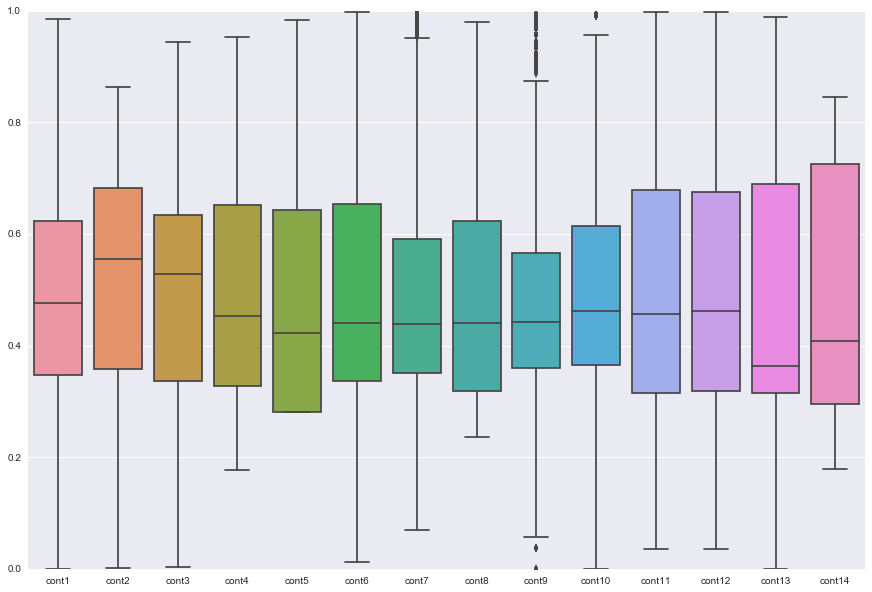

In [38]:
p = re.compile('cont[0-9]+')

cont_features = [c for c in train.columns if p.match(c)]
plt.figure(figsize=(15, 10))
sns.boxplot(data=local_train_X[cont_features])

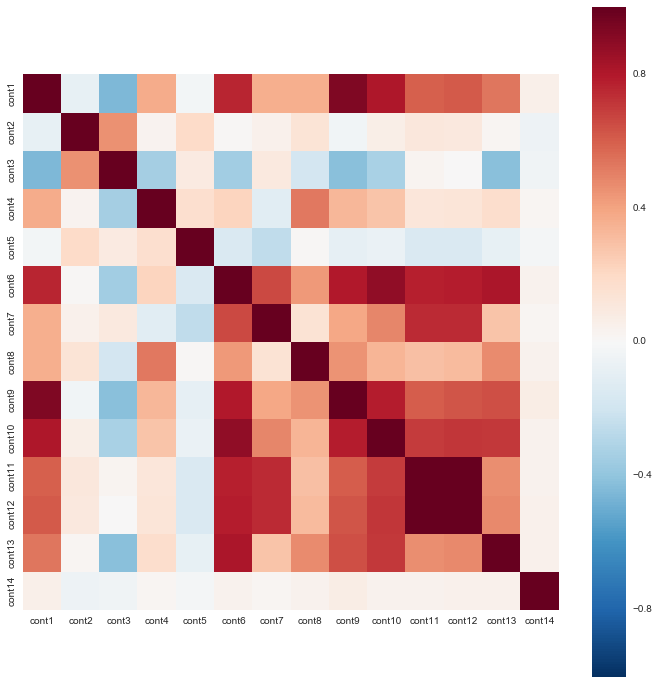

In [39]:
corr = local_train_X.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

## Feature Engineering

Take a look at dmi3kno's kernel on feature engineering. (https://www.kaggle.com/dmi3kno/allstate-claims-severity/all-the-allstate-states-eda/code)
    - Can we extract states from the data?